In [996]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filename = "./mult429.csv"

In [997]:
data = pd.read_csv(filename, header=None)
data.columns = ['Time', 'Voltage']

In [998]:
start_limit = 433
middle_limit = 835
end_limit = 1447
high_region = data.iloc[middle_limit:end_limit,:]
low_region = data.iloc[start_limit:middle_limit,:]
period = data.iloc[start_limit:end_limit,:]

In [999]:
mean_high = high_region.iloc[:,1].mean()
mean_low = low_region.iloc[:,1].mean()
std_high = high_region.iloc[:,1].std()
std_low = low_region.iloc[:,1].std()
# 95 percent confidence interval
confidence_interval_high = 1.96 * (std_high / np.sqrt(len(high_region.iloc[:,1])))
confidence_interval_low = 1.96 * (std_low / np.sqrt(len(low_region.iloc[:,1])))
(mean_high, confidence_interval_high), (mean_low, confidence_interval_low)

((np.float64(0.12003447712418298), np.float64(0.0008829299076059075)),
 (np.float64(0.04638283582089552), np.float64(0.0011919854815177662)))

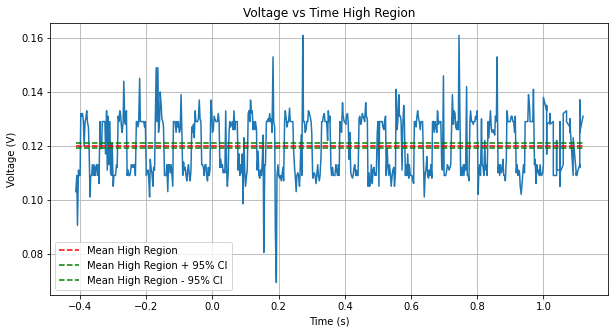

In [1000]:
plt.figure(facecolor='white',figsize=(10, 5))
plt.grid()
plt.title("Voltage vs Time High Region")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(high_region.iloc[:,0],high_region.iloc[:,1])
plt.plot(high_region.iloc[:,0],mean_high*np.ones(len(high_region.iloc[:,0])),'r--',label='Mean High Region')
plt.plot(high_region.iloc[:,0],(mean_high+confidence_interval_high)*np.ones(len(high_region.iloc[:,0])),'g--',label='Mean High Region + 95% CI')
plt.plot(high_region.iloc[:,0],(mean_high-confidence_interval_high)*np.ones(len(high_region.iloc[:,0])),'g--',label='Mean High Region - 95% CI')
plt.legend()

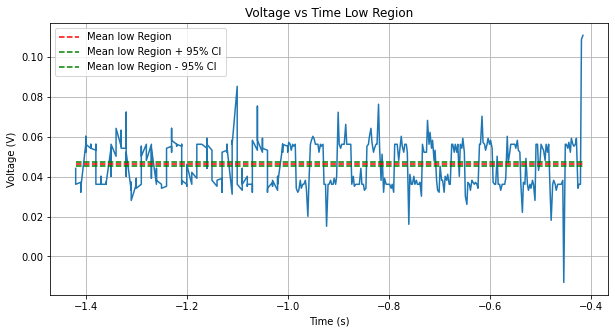

In [1001]:
plt.figure(facecolor='white',figsize=(10, 5))
plt.grid()
plt.title("Voltage vs Time Low Region")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.plot(low_region.iloc[:,0],low_region.iloc[:,1])
plt.plot(low_region.iloc[:,0],mean_low*np.ones(len(low_region.iloc[:,0])),'r--',label='Mean low Region')
plt.plot(low_region.iloc[:,0],(mean_low+confidence_interval_low)*np.ones(len(low_region.iloc[:,0])),'g--',label='Mean low Region + 95% CI')
plt.plot(low_region.iloc[:,0],(mean_low-confidence_interval_low)*np.ones(len(low_region.iloc[:,0])),'g--',label='Mean low Region - 95% CI')
plt.legend()

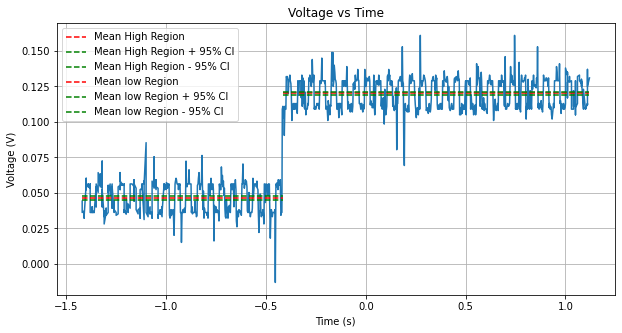

In [1002]:
plt.figure(facecolor='white',figsize=(10, 5))
plt.title("Voltage vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.grid()
plt.plot(period.iloc[:,0],period.iloc[:,1])
plt.plot(period.iloc[middle_limit-start_limit:,0],mean_high*np.ones(len(period.iloc[middle_limit-start_limit:,0])),'r--',label='Mean High Region')
plt.plot(period.iloc[middle_limit-start_limit:,0],(mean_high+confidence_interval_high)*np.ones(len(period.iloc[middle_limit-start_limit:,0])),'g--',label='Mean High Region + 95% CI')
plt.plot(period.iloc[middle_limit-start_limit:,0],(mean_high-confidence_interval_high)*np.ones(len(period.iloc[middle_limit-start_limit:,0])),'g--',label='Mean High Region - 95% CI')
plt.plot(period.iloc[:middle_limit-start_limit,0],mean_low*np.ones(len(period.iloc[:middle_limit-start_limit,0])),'r--',label='Mean low Region')
plt.plot(period.iloc[:middle_limit-start_limit,0],(mean_low+confidence_interval_low)*np.ones(len(period.iloc[:middle_limit-start_limit,0])),'g--',label='Mean low Region + 95% CI')
plt.plot(period.iloc[:middle_limit-start_limit,0],(mean_low-confidence_interval_low)*np.ones(len(period.iloc[:middle_limit-start_limit,0])),'g--',label='Mean low Region - 95% CI')
plt.legend()
plt.show()

In [1003]:
t_high_begin = high_region.iloc[0,0]
t_high_end = high_region.iloc[-1,0]
t_low_begin = low_region.iloc[0,0]
t_low_end = low_region.iloc[-1,0]

t_high_difference = t_high_end - t_high_begin
print("High Region Time Difference: ", t_high_difference)

High Region Time Difference:  1.5330000000000001


In [1004]:
NUM_OPERATOINs = 6400000

In [1005]:
voltage_difference = mean_high - mean_low
print("Voltage Difference: ", voltage_difference)

Voltage Difference:  0.07365164130328747


In [1006]:
resistance = 1
current = voltage_difference / resistance
power_per_sec = current**2 * resistance
print("Power per second: ", power_per_sec, "W")

Power per second:  0.0054245642666681205 W


In [1007]:
total_energy = float(power_per_sec * t_high_difference)
print("Total Energy: ", total_energy, "Joules")

Total Energy:  0.00831585702080223 Joules


In [1008]:
resistance = 1
current = voltage_difference / resistance
power_per_sec = current**2 * resistance / NUM_OPERATOINs
print("Power per second per operation: ", power_per_sec, "W")

Power per second per operation:  8.475881666668938e-10 W


In [1009]:
total_energy = float(power_per_sec * t_high_difference)
print("Total Energy per operation: ", total_energy, "Joules")

Total Energy per operation:  1.2993526595003483e-09 Joules
